<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
T-Tests and ANOVA</p>
</div>

NTL-DS-051324
<p>Phase 2</p>
<br>
<br>

<div align = "right">
<img src="images/flatiron-school-logo.png" align = "right" width="200"/>
</div>

### WARM UP

#### Question 1: Choosing Between Z-test and T-test
#### Question: You are conducting a study on the effect of a new diet on body weight. You collect data from 25 participants before and after implementing the diet for 3 months. The population standard deviation is unknown. Which test would you use to analyze the data: a Z-test or a T-test? Justify your choice.


<details>
    <summary>Answer</summary>
A T-test should be used since the population standard deviation is unknown and the sample size is small (n = 25). This scenario fits the assumptions for using the T-test, specifically an independent samples T-test if comparing two different groups, or a paired T-test if comparing the same group before and after the diet.

    </details>

#### Question 2: Interpretation of Results
#### Question: After conducting a T-test comparing the average scores of two classes on a final exam, you obtain a p-value of 0.03. If you set your significance level (alpha) at 0.05, what does this result mean in terms of statistical significance and the null hypothesis?


<details>
    <summary>Answer</summary>
The p-value of 0.03 is less than the significance level of 0.05, which means the result is statistically significant. This suggests there is sufficient evidence to reject the null hypothesis, indicating a significant difference between the average scores of the two classes.

    </details>

#### Question 3: Application Scenario 
#### Question: A researcher measures the concentration of a particular chemical in a river before and after a factory begins operations upstream. The measurements are taken at 10 different points along the river, both times under similar environmental conditions. The researcher wants to determine if the factory's operations have significantly affected the chemical concentration in the river. Which statistical test should be used, and why?

<details>
    <summary>Answer</summary>
A paired T-test is appropriate in this scenario because the same locations are measured before and after the factory begins operations, making the data points paired. This test will compare the means of the two related groups to determine if there's a statistically significant difference in the chemical concentration due to the factory's operations.
    </details>

In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# Objectives

- Understand the issues of multiple comparisons
- Compare and contrast $t$-tests with ANOVA
- Implement ANOVA in Python

# Preparing Some Data

We will use the data from this [documentation on SciPy's `f_oneway()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html) "on a shell measurement (the length of the anterior adductor muscle scar, standardized by dividing by length) in the mussel *Mytilus trossulus* from five locations: Tillamook, Oregon; Newport, Oregon; Petersburg, Alaska; Magadan, Russia; and Tvarminne, Finland, taken from a much larger data set"

<img alt="mytilus trossulus mussel shell" src="images/mytilus_trossulus_inside.jpg" width=50%/>

> Image from Walla Walla University: https://inverts.wallawalla.edu/Mollusca/Bivalvia/Mytiloida/Mytilidae/Mytilus_trossulus.html

In [2]:
# Data found from above URL
tillamook = [0.0571, 0.0813, 0.0831, 0.0976, 0.0817, 0.0859, 0.0735,
             0.0659, 0.0923, 0.0836]
newport = [0.0873, 0.0662, 0.0672, 0.0819, 0.0749, 0.0649, 0.0835,
           0.0725]
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764,
           0.0689]
tvarminne = [0.0703, 0.1026, 0.0956, 0.0973, 0.1039, 0.1045]

# Nice DF for us
data = []
data += [('tillamook', v) for v in tillamook]
data += [('newport', v) for v in newport]
data += [('petersburg', v) for v in petersburg]
data += [('magadan', v) for v in magadan]
data += [('tvarminne', v) for v in tvarminne]

df = pd.DataFrame(data=data, columns=['area','shell_standardized'])
df.sample(8)
df


,area,shell_standardized
0,tillamook,0.0571
1,tillamook,0.0813
2,tillamook,0.0831
3,tillamook,0.0976
4,tillamook,0.0817
5,tillamook,0.0859
6,tillamook,0.0735
7,tillamook,0.0659
8,tillamook,0.0923
9,tillamook,0.0836


In [3]:
df.groupby('area').agg(['mean', 'std'])


shell_standardized          
                         mean       std
area                                   
magadan              0.078012  0.012945
newport              0.074800  0.008597
petersburg           0.103443  0.016209
tillamook            0.080200  0.011963
tvarminne            0.095700  0.012962

<details>
    <summary>Answer</summary>

```python
    
df.groupby('area').agg(['mean', 'std'])

```
</details>

# Comparing Samples to Another

In the past lectures, we focused on 1-sample tests where we compare a sample with the population.

But sometimes we really want to compare two or more samples together. That's going to be our main focus today.

We'll start with the two sample $t$-test and then discuss its limitations.

## Two Sample $t$-Test

> Sometimes we want to do a hypothesis test to compare two samples to see if they're not significantly different from another (they come from the same overlying population).

We won't go into the details of performing a two sample $t$-test, but know that we must consider the means, samples' standard deviations, and number of observations for each sample to perform the test.

> **MATH**
> 
> Here is the formula for the two sample $t$-test:
> 
> $$ t = \frac{\bar{x_1} - \bar{x_2}}{\sqrt{s^2 \left( \frac{1}{n_1} + \frac{1}{n_2} \right)}}$$
>
> where $s^2$ is the pooled sample variance:
>
> $$ s^2 = \frac{\sum_{i=1}^{n_1} \left(x_i - \bar{x_1}\right)^2 + \sum_{j=1}^{n_2} \left(x_j - \bar{x_2}\right)^2 }{n_1 + n_2 - 2} $$

We can use SciPy's implementation using either the samples (`scipy.stat.ttest_ind()`) or the statistics of the samples (`scipy.stat.ttest_ind_from_stats()`). Here are their respective documentations:

- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind_from_stats.html

### Visualization of Two Samples

Let's isolate the two Oregon locations and observe what these two groups look like:

In [4]:
print('tillamook:')
df_tillamook = df[df['area'] == 'tillamook']
display(df_tillamook.describe())
print('\n----------------------\n')
print('newport:')
df_newport = df[df['area'] == 'newport']
df_newport.describe()

tillamook:


,shell_standardized
count,10.000000
mean,0.080200
std,0.011963
min,0.057100
25%,0.075450
50%,0.082400
75%,0.085325
max,0.097600



----------------------

newport:


,shell_standardized
count,8.000000
mean,0.074800
std,0.008597
min,0.064900
25%,0.066950
50%,0.073700
75%,0.082300
max,0.087300


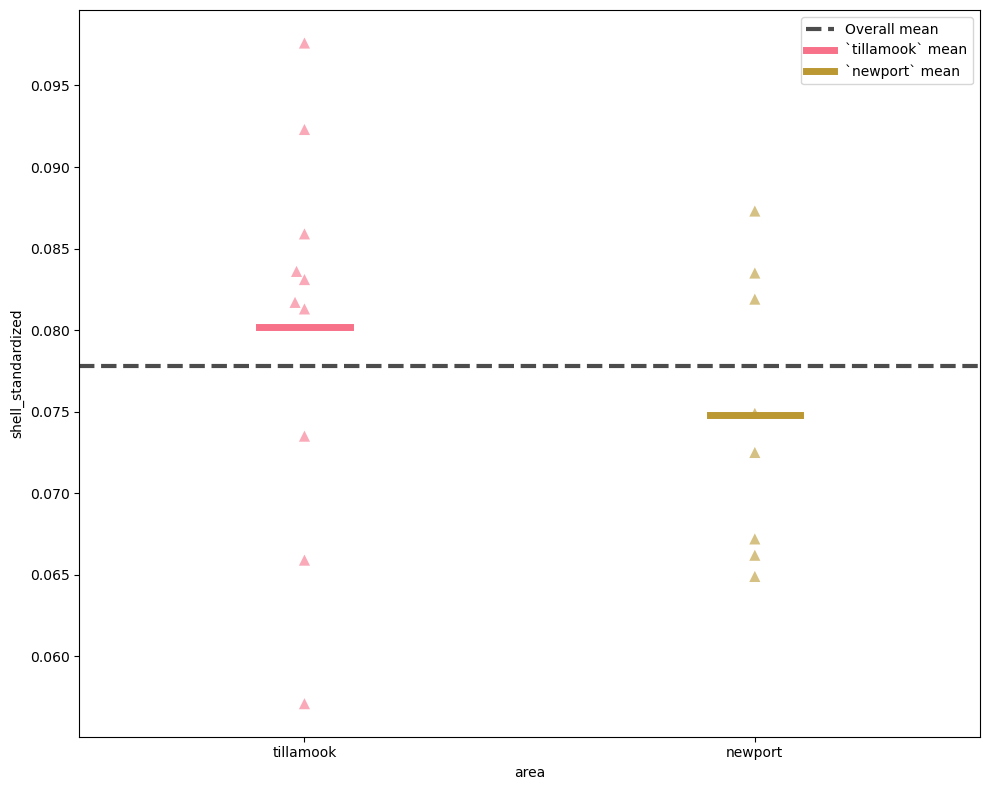

In [5]:
f, ax = plt.subplots(figsize=(10, 8))

# Use specific set of colors
colors = sns.color_palette('husl')

# Select only two areas
selection_mask = (df['area'] == 'tillamook') | (df['area'] == 'newport')
data_subset = df[selection_mask]

# Data Points
ax = sns.swarmplot(
    data=data_subset,
    x="area",
    y="shell_standardized",
    ax=ax,
    alpha=0.6, 
    marker='^',
    size=8,
    palette=colors
)

ax.axhline(
    data_subset['shell_standardized'].mean(), label='Overall mean',
    lw=3, ls='--', color='black', alpha=0.7
)

# Look at each specifc group (by area)
areas = data_subset['area'].unique()
for i, area in enumerate(areas):
    mean = df[df['area']==area]['shell_standardized'].mean()
    # Make these lines short and near each group
    xmin = 1/len(areas) * i + 0.2
    xmax = xmin + 0.1
    ax.axhline(
        mean, xmin=xmin, xmax=xmax, label=f'`{area}` mean',
        lw=5, ls='-', color=colors[i]
    ) 
    
ax.legend()
plt.tight_layout();

### Performing the Two-Sample $t$-Test (SciPy)

Before getting our test statistic and p-value, we should define our significance level $\alpha$. In this case we'll set to a conservative $\alpha=0.01$

In [6]:
# Peform the two-sample t-test (are the samples different?)
print(stats.ttest_ind(tillamook, newport, equal_var=False))

Ttest_indResult(statistic=1.112729859319956, pvalue=0.2823978786684557)


And we see that we don't have a significant result between these two (don't reject $H_0$)

## But I Want It All!

> We could compare multiple times with $t$-tests. 
> 
> What's the worst that can happen...? ***foreshadowing***

### Visualization of More Samples

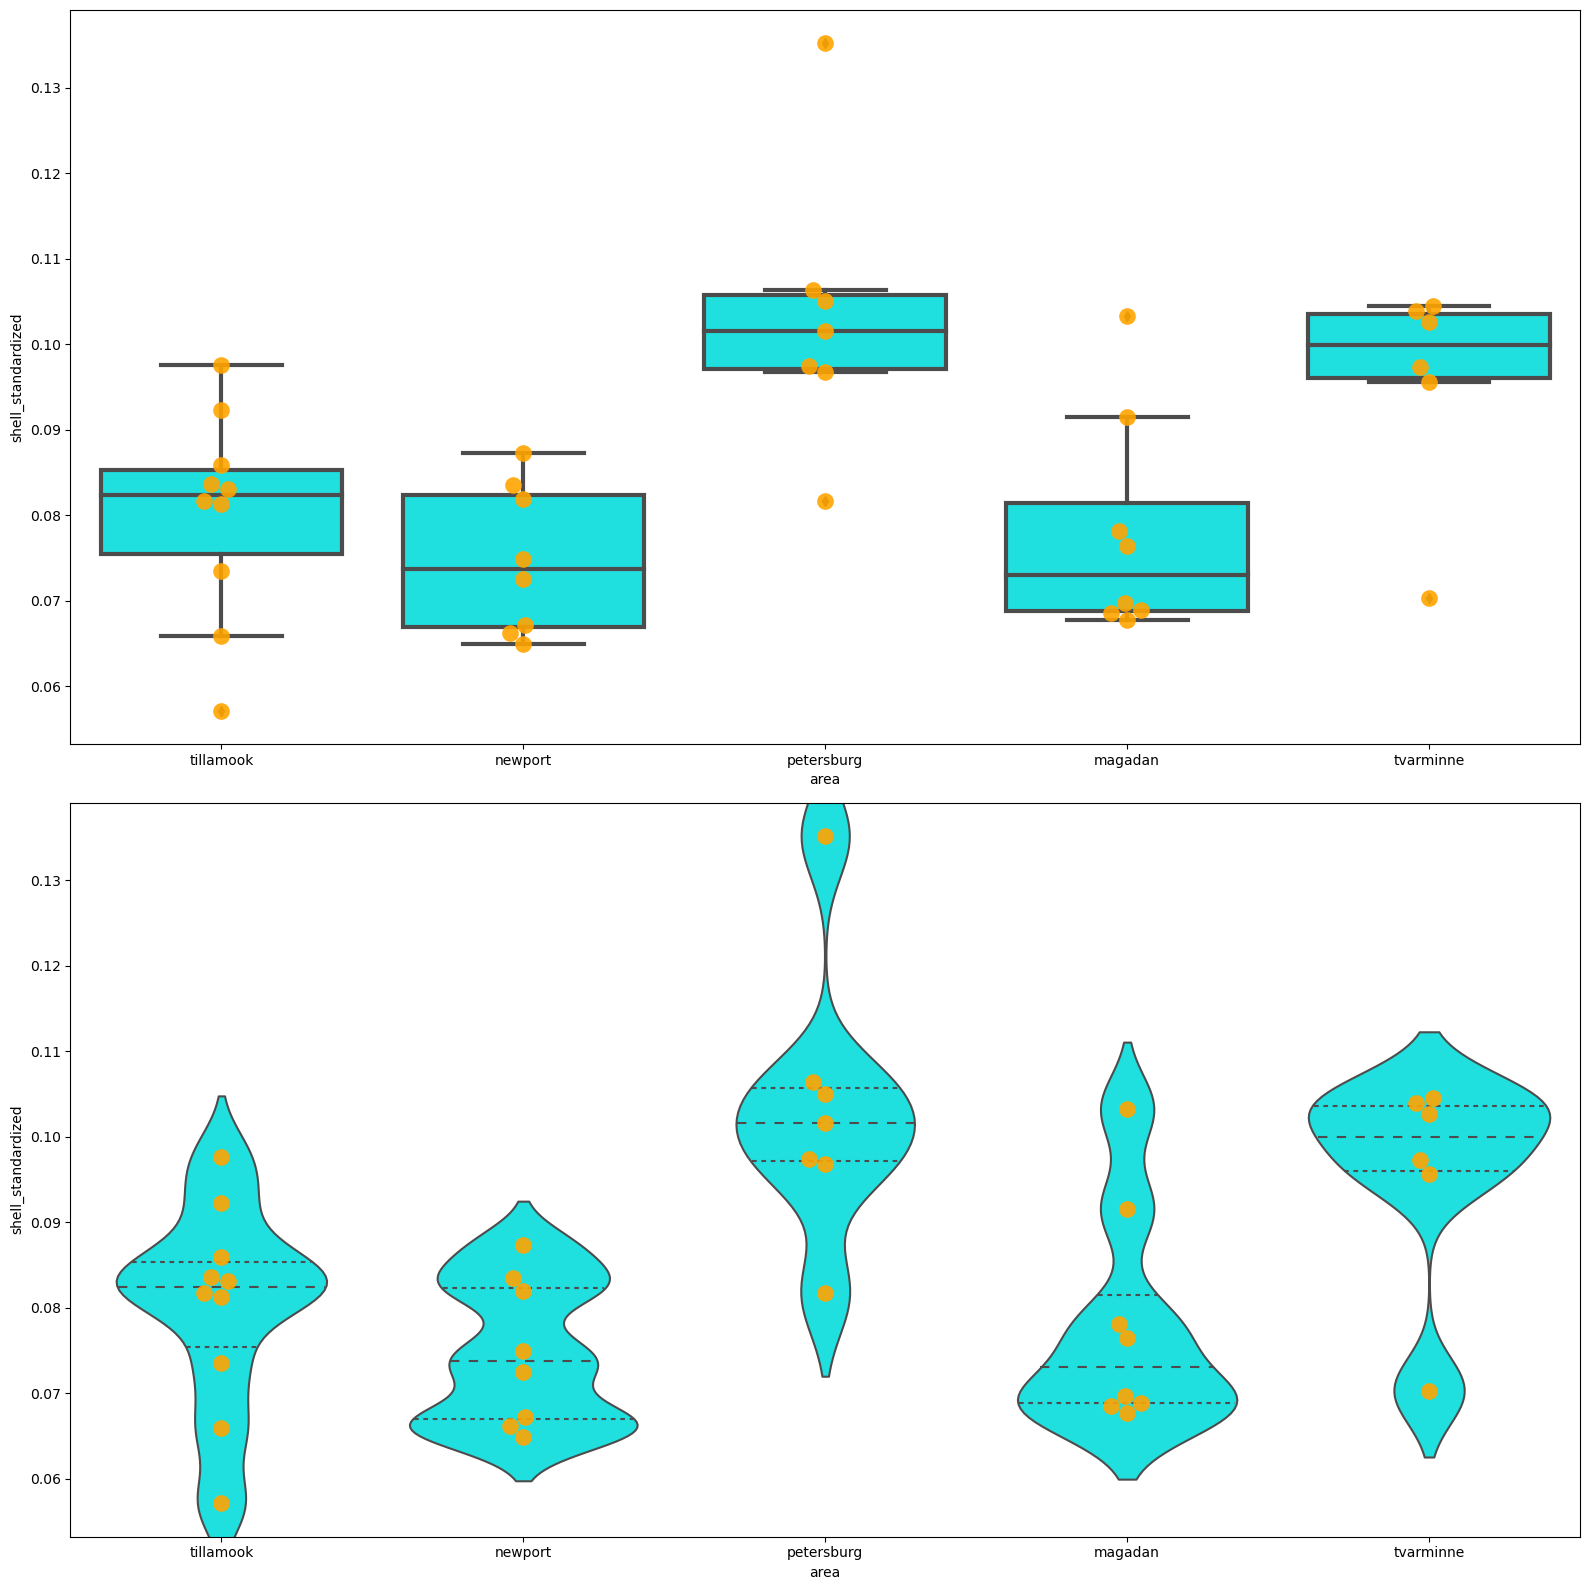

In [7]:
fig, (ax0,ax1) = plt.subplots(nrows=2, figsize=(16, 16))

sns.boxplot(
    x="area",
    y="shell_standardized",
    data=df,
    ax=ax0,
    color='aqua', 
    linewidth=3
)

sns.swarmplot(
    x="area",
    y="shell_standardized",
    data=df,
    ax=ax0,
    color='orange', 
    alpha=0.9, 
    size=12
)



sns.violinplot(
    y="shell_standardized", 
    x="area", 
    data=df, 
    ax=ax1,
    color='aqua',
    inner="quartile",  # Seeing the mean and quartiles
    bw=.3              # How much smoothing do we use
)

sns.swarmplot(
    x="area",
    y="shell_standardized",
    data=df,
    ax=ax1,
    color='orange', 
    alpha=0.9, 
    size=12
)

plt.tight_layout();

### Performing Multiple $t$-tests ← DO NOT DO!

> ☠️ ***WARNING*** ☠️
>
> You shouldn't perform multiple $t$-tests! We do this for illustrative purposes!
>
> We are trained data science stunt-statisticians; do not try this at home, workplace, or in front of stakeholders

In [8]:
# Extra tools to make this stunt easier to do
from itertools import combinations
groups = {'tillamook':tillamook, 'newport':newport, 'magadan':magadan,
          'tvarminne':tvarminne, 'petersburg':petersburg}

# Our signifance level
alpha = 0.01

# Perform two sample t-tests on all combination pairs
for group_a, group_b in combinations(groups,2):
    # Make it easy for us to identify
    print(f't-test on {group_a} & {group_b}')
    
    # Easy reference of samples
    X_a = groups.get(group_a)
    X_b = groups.get(group_b)
    # Perform our test on pair
    t, p = stats.ttest_ind(X_a, X_b)
    
    # Print our values
    print(f'\t t:{t:.2f}, p:{p:.3f}')
    if p < alpha:
        print(f'\t***** SIGNIFICANT AT {alpha} LEVEL****')
    print('\n')

t-test on tillamook & newport
	 t:1.07, p:0.300


t-test on tillamook & magadan
	 t:0.37, p:0.715


t-test on tillamook & tvarminne
	 t:-2.43, p:0.029


t-test on tillamook & petersburg
	 t:-3.41, p:0.004
	***** SIGNIFICANT AT 0.01 LEVEL****


t-test on newport & magadan
	 t:-0.58, p:0.568


t-test on newport & tvarminne
	 t:-3.64, p:0.003
	***** SIGNIFICANT AT 0.01 LEVEL****


t-test on newport & petersburg
	 t:-4.36, p:0.001
	***** SIGNIFICANT AT 0.01 LEVEL****


t-test on magadan & tvarminne
	 t:-2.53, p:0.026


t-test on magadan & petersburg
	 t:-3.38, p:0.005
	***** SIGNIFICANT AT 0.01 LEVEL****


t-test on tvarminne & petersburg
	 t:-0.94, p:0.368




So it looks like **newport and tvarminne** are significantly different from one another and every group except tvarminne is significantly different from **petersburg**! So there is a difference, right?

Turns out there are some issues with the little stunt we pulled 🤕

### Issues?

There are some concerns in what we just did:

- If we test _every_ combination, this can be a lot of $t$-tests
    + You would need $\frac{n(n-1)}{2}$ $t$-tests
- If there really isn't a difference, we're more likely to have false positives (type 1 errors)
    + If our original probability of making a Type 1 error was $\alpha$ and we do $n$ tests, then the probability of getting a Type 1 error would grow to $1-(1-\alpha)^n$. In our case of $10$ tests & $\alpha=0.01$, we have $1-(1-0.05)^{10}$ or $10\%$ chance of making an error!

![](https://imgs.xkcd.com/comics/significant.png)

# ANOVA - Analysis of Variance

One solution to the multiple comparison problem is to perform a statistical test that looks at _all_ the samples together to determine if they are statistically different. 

One such test is the **analysis of variance** or **ANOVA test** (also called the **$F$ one-way test**).

![](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d3/V838_Mon_HST.jpg/480px-V838_Mon_HST.jpg)
<!-- 
https://commons.wikimedia.org/wiki/File:V838_Mon_HST.jpg
The Hubble material you see on this page is copyright-free. Material credited to STScI on this site was created, authored, and/or prepared for NASA under Contract NAS5-26555.
-->

> ANOVA: an acronym, not a stellar object. Well, it is pretty stellar but not in the space sense.

## The $F$-Statistic

At the heart of ANOVA is the **$F$-statistic** **$F$-ratio**.

![](images/heart_of_anova.png)

We won't dig into the math, since honestly we don't need to do it by hand generally. But know the $F$-statistic is trying to capture the variance _between groups_ and _within groups_. This is done by comparing the individuals with the group means and the overall mean.

The $F$-distribution therefore has **two** degrees-of-freedom parameters, and can in fact be thought of as a ratio of $\chi^2$ distributions.

For more on how the $F$-distribution is relevant to ANOVA, see [this post](https://blog.minitab.com/en/adventures-in-statistics-2/understanding-analysis-of-variance-anova-and-the-f-test).

Just like with $t$ and $z$ tests, we calculate a test statistic, then compare it to a critical value associated with a probability distribution. In this case, that distribution is the [$F$-distribution](https://en.wikipedia.org/wiki/F-distribution).

Let's draw some $F$ curves:

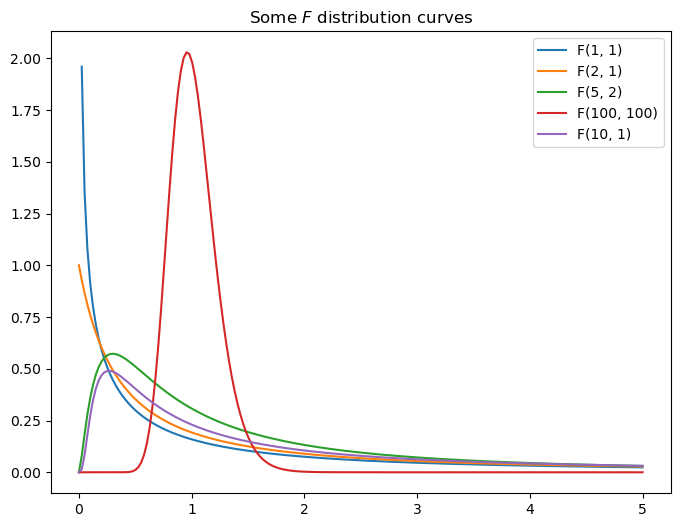

In [10]:
#degrees of freedom in the numerator (dfn)
#degrees of freedom in the denominator (dfd)


f_11 = stats.f(dfn=1, dfd=1)
f_21 = stats.f(dfn=2, dfd=1)
f_52 = stats.f(dfn=5, dfd=2)
f_101 = stats.f(dfn=10, dfd=1)
f_100100 = stats.f(dfn=100, dfd=100)
x = np.linspace(0, 5, 200)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, f_11.pdf(x), label='F(1, 1)')
ax.plot(x, f_21.pdf(x), label='F(2, 1)')
ax.plot(x, f_52.pdf(x), label='F(5, 2)')
ax.plot(x, f_100100.pdf(x), label='F(100, 100)')
ax.plot(x, f_101.pdf(x), label='F(10, 1)')

ax.set_title('Some $F$ distribution curves')

ax.legend();

### Visualizing the Data and $F$-Statistic

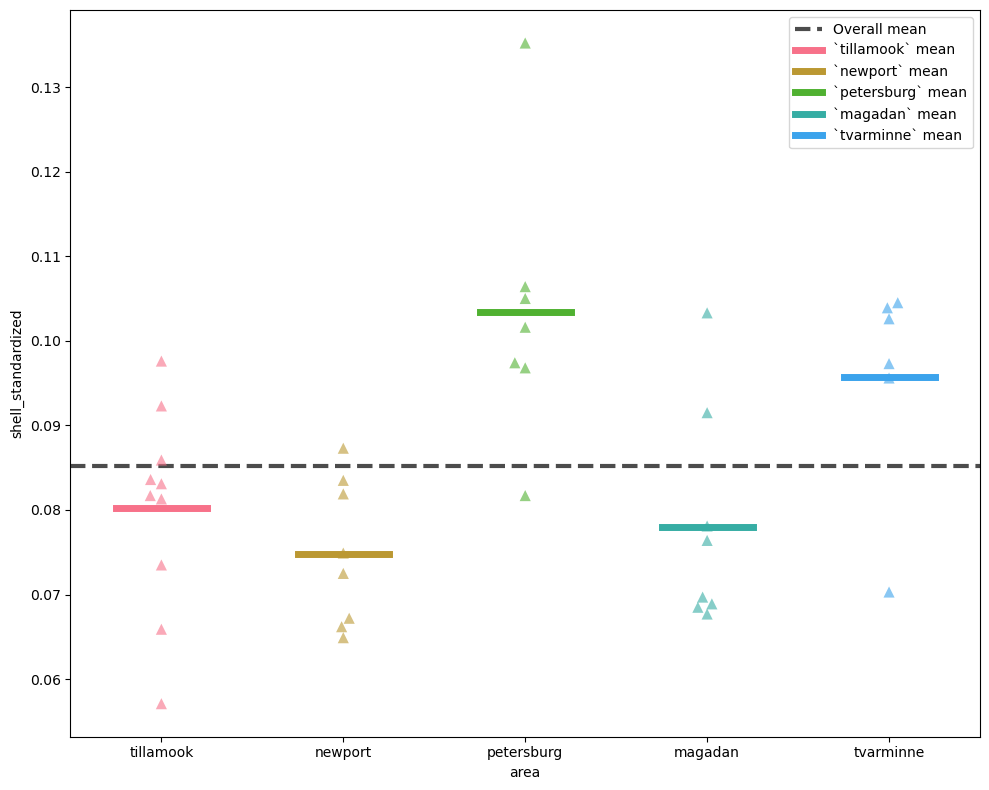

In [11]:
f, ax = plt.subplots(figsize=(10,8))

# Use specific set of colors
colors = sns.color_palette('husl')

# Data Points
ax = sns.swarmplot(
    data=df,
    x="area",
    y="shell_standardized",
    ax=ax,
    alpha=0.6, 
    marker='^',
    size=8,
    palette=colors
)

# Overall mean line
ax.axhline(
    df['shell_standardized'].mean(), label='Overall mean',
    lw=3, ls='--', color='black', alpha=0.7
)

# Look at each specifc group (by area)
areas = df['area'].unique()
for i,area in enumerate(areas):
    mean = df[df['area']==area]['shell_standardized'].mean()
    # Make these lines short and near each group
    xmin = 1/len(areas) * i + 0.05
    xmax = xmin + 0.1
    ax.axhline(
        mean, xmin=xmin, xmax=xmax, label=f'`{area}` mean',
        lw=5, ls='-', color=colors[i]
    ) 
    
ax.legend()
plt.tight_layout();

#### More Details on Variance Between and Within Groups

<img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/12/image046.png" width="500">

### Between Group Variability

Measures how much the means of each group vary from the mean of the overall population



<img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/12/image0171.png" width="500">
    

### Within Group Variability

Refers to variations caused by differences within individual groups.  

Consider the given distributions of three samples below. As the spread (variability) of each sample is increased, their distributions overlap and they become part of a big population.
<img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/12/image031.png" width="900">

Now consider another distribution of the same three samples but with less variability. Although the means of samples are similar to the samples in the above image, they seem to belong to different populations.

<img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/12/image033.png" width="900">


## Performing One-Way ANOVA

We saw from above that it probably isn't immediately obvious if these groups are in fact different. We still do our normal steps for hypothesis steps but use the [`scipy.stats.f_oneway()` function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html) to get our test statistic ($F$-statistic)  and p-value.

- $H_0$ : $\mu_{tillamook} = \mu_{newport} = \mu_{magadan} = \mu_{tvarminne} = \mu_{petersburg}$
- $H_a$ : $H_0$ is not true

In [12]:
# Define our alpha significance level
alpha = 0.01

In [13]:
groups = {'tillamook':tillamook, 'newport':newport, 'magadan':magadan,
          'tvarminne':tvarminne, 'petersburg':petersburg}

# Note I'm simply unpacking the iterator instead of typing each out
result = stats.f_oneway(*groups.values())
f_stat, p = result
# Printing out the result just to show what it looks like
result

F_onewayResult(statistic=7.121019471642445, pvalue=0.0002812242314534552)

In [14]:
print(*groups.values())

[0.0571, 0.0813, 0.0831, 0.0976, 0.0817, 0.0859, 0.0735, 0.0659, 0.0923, 0.0836] [0.0873, 0.0662, 0.0672, 0.0819, 0.0749, 0.0649, 0.0835, 0.0725] [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764, 0.0689] [0.0703, 0.1026, 0.0956, 0.0973, 0.1039, 0.1045] [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]


In [15]:
conclusion = 'significant' if p < alpha else 'not significant'

print(f'''
The difference between the different groups was {conclusion} for a significance
level of {alpha}.
''')


The difference between the different groups was significant for a significance
level of 0.01.



### Note: Excluding One Group

> Note that we could have an _insignificant_ result if we removed "petersburg" from the group

In [16]:
groups = {'tillamook':tillamook, 'newport':newport, 'magadan':magadan, 'tvarminne':tvarminne}

# Note I'm simply unpacking the iterator instead of typing each out
result = stats.f_oneway(*groups.values())
f_stat, p = result

print(result)

conclusion = 'significant' if p < alpha else 'not significant'

print(f'''
The difference between the different groups was {conclusion} for a significance
level of {alpha}.
''')

F_onewayResult(statistic=4.10752164748393, pvalue=0.015554878284932846)

The difference between the different groups was not significant for a significance
level of 0.01.



## ANOVA is an Omnibus Test

Remember that ANOVA only tells us _if_ there is significant difference in the groups, not _which_ group is significant.

> **NOTE** 
>
>If we follow up with trying to find which groups are significantly different from each other, you have to consider *post-hoc* tests. You should avoid doing _multiple_ tests.
>
> More information can be found in a [Level Up section](#Level-Up---Follow-Up-with-Post-Hoc-Tests) below.

# Exercise 1: Two-Sample T-Test

A sample of 20 students from Dr. Strange's Multiverse 101 lecture course showed an average of 80.5 points on the last test, with a standard deviation of 9.9 points. Meanwhile, a sample of 28 students from Dr. Manhattan's Multiverse 101 lecture course showed an average of 86.3 points on the same test, with a standard deviation of 11.2 points. Are Dr. Strange's students performing (significantly) better than Dr. Manhattan's? Assume the two student populations have equal variances and use an alpha level of 0.05.

Bonus:
- How can we calculate the pooled variance for these samples?
- How can we calculate the t-statistic by hand?

In [17]:
stats.ttest_ind_from_stats(mean1=80.5,
                          std1=9.9,
                          nobs1=20,
                          mean2=86.3,
                          std2=11.2,
                          nobs2=28)

Ttest_indResult(statistic=-1.8545524566497287, pvalue=0.070076905461433)

<details>
    <summary>Answer</summary>
    
```python
stats.ttest_ind_from_stats(mean1=80.5,
                          std1=9.9,
                          nobs1=20,
                          mean2=86.3,
                          std2=11.2,
                          nobs2=28)
```    
</details>

<details>
    <summary>Bonus Answer</summary>

```python
mean1 = 80.5
std1 = 9.9
nobs1 = 20
mean2 = 86.3
std2 = 11.2
nobs2 = 28
sum_x1_diffs_sq = (nobs1-1) * std1**2
sum_x2_diffs_sq = (nobs2-1) * std2**2
var_pool = (sum_x1_diffs_sq + sum_x2_diffs_sq) / (nobs1+nobs2-2)
t_stat = (mean1 - mean2) / np.sqrt(var_pool * (1/nobs1 + 1/nobs2))
print(var_pool)
print(t_stat)
```
</details>

# Exercise 2: Two-Sample T-Test

**Conduct statistical test on flipper length means**

- $H_0$: The difference in the average flipper lengths of male and female chinstraps is not statistically significantly different from zero.

- $H_A$: The difference in the average flipper lengths of male and female chinstraps is greater than zero.

Is this one-tailed or two-tail test?

In [18]:
pg_df = sns.load_dataset('penguins').dropna()
pg_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


Create a DataFrame with the flipper length and sex for only Chinstrap

In [20]:
chinstrap_df = pg_df[pg_df['species'] == 'Chinstrap'].loc[:,['flipper_length_mm', 'sex']]
chinstrap_df

,flipper_length_mm,sex
152,192.0,Female
153,196.0,Male
154,193.0,Male
155,188.0,Female
156,197.0,Male
...,...,...
215,207.0,Male
216,202.0,Female
217,193.0,Male
218,210.0,Male


<details>
    <summary>Answer</summary>

```python
chinstrap_df = pg_df[pg_df['species'] == 'Chinstrap'].loc[:,['flipper_length_mm', 'sex']]
#or
chinstrap_df = pg_df[pg_df['species'] == 'Chinstrap'][['flipper_length_mm', 'sex']]

```
</details>

Groupby sex: aggregate and compare sample means:

In [21]:
chinstrap_means = chinstrap_df.groupby('sex').mean()
chinstrap_means

,flipper_length_mm
sex,
Female,191.735294
Male,199.911765


<details>
    <summary>Answer</summary>

```python    
chinstrap_means = chinstrap_df.groupby('sex').mean()
chinstrap_means
```
</details>



Calculate the sample spread.

In [22]:
chinstrap_stds = chinstrap_df.groupby('sex').std()
chinstrap_stds

,flipper_length_mm
sex,
Female,5.754096
Male,5.976558



<details>
    <summary>Answer</summary>

```python
chinstrap_stds = chinstrap_df.groupby('sex').std()
chinstrap_stds
```
</details>

Remember:
- It wasn't clear whether the difference in means was a meaningful difference
- or just a statistical fluctuation

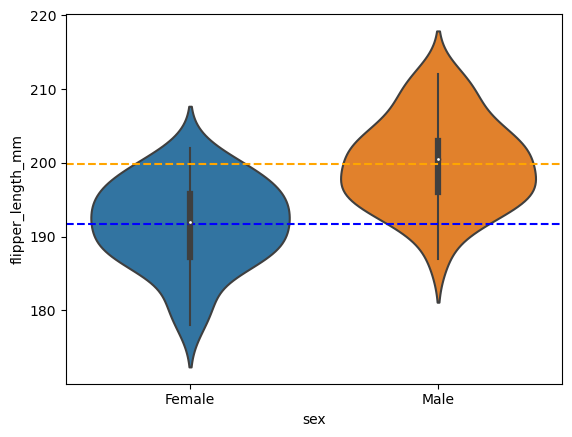

In [23]:
fig, ax = plt.subplots()
sns.violinplot(x = 'sex', y = 'flipper_length_mm', 
               data = chinstrap_df, ax = ax)
ax.axhline(y =chinstrap_means.loc['Female'].values,
          c = 'blue', linestyle = '--')
ax.axhline(y =chinstrap_means.loc['Male'].values,
          c = 'orange', linestyle = '--')
plt.show()

**Assuming null is normally distributed**

- ttest_ind: conduct t-test for two independent samples
    - takes in samples directly and type of tailed test

In [24]:
from scipy.stats import ttest_ind # this is the two sample t-test function



In [25]:
#get the flipper length for males and females
fem_chinstraps = chinstrap_df[chinstrap_df['sex'] == 'Female']['flipper_length_mm']
male_chinstraps = chinstrap_df[chinstrap_df['sex'] == 'Male']['flipper_length_mm']


In [ ]:
#Perform the two sample t-test


<details>
    <summary>Answer</summary>

```python
ttest_ind(male_chinstraps, fem_chinstraps, equal_var = False, alternative = 'greater')
```
</details>


Do we reject the null?

**Caveat**

If using older version of scipy *alternative = ___* doesnt exist:
- outputs p-value for two tailed test
- one tailed test is half of that

In [ ]:
# older Scipy versions only do two tailed two-sample t-tests
ttest_ind(male_chinstraps, fem_chinstraps, equal_var = False,alternative='greater')[1]


Can also do a two sample t-test if given:
- means of the two samples
- stds of the two samples
- sample sizes

**Situation is rarer than just having the samples, but does happen**

In [26]:
from scipy.stats import ttest_ind_from_stats

```python
ttest_ind_from_stats(mean1, std1, nobs1, mean2, std2, nobs2, equal_var=, alternative=)
```

In [27]:
male_mean = chinstrap_means.loc['Male'].values
female_mean = chinstrap_means.loc['Female'].values

male_std = chinstrap_stds.loc['Male'].values
female_std = chinstrap_stds.loc['Female'].values

Nbysex = chinstrap_df.groupby('sex').count()
N_male = Nbysex.loc['Male'].values
N_female= Nbysex.loc['Female'].values

In [28]:
male_mean

array([199.91176471])

```python
tttest_ind(sample1, sample2, equal_var = False, alternative = ... )
```
- equal_var = False:
    - does not assume variance of populations are same
    - generalizes to unequal sample sizes

In [29]:
ttest_ind_from_stats(male_mean, male_std, N_male, female_mean, female_std,
                     N_female, equal_var=False, alternative='greater')


Ttest_indResult(statistic=array([5.74671945]), pvalue=array([1.26757404e-07]))

Flipper length could be a good variable to use for helping to differentiating between male and female Chinstraps.

# Level Up - `statsmodels`

In [30]:
#import statsmodels.api as sm
from statsmodels.formula.api import ols

> The OLS method from `statsmodels` gives an ANOVA table

In [31]:
anova_season = ols('shell_standardized ~ C(area)', data=df).fit()
anova_season.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     shell_standardized   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     7.121
Date:                Fri, 07 Jun 2024   Prob (F-statistic):           0.000281
Time:                        11:55:06   Log-Likelihood:                 117.94
No. Observations:                  39   AIC:                            -225.9
Df Residuals:                      34   BIC:                            -217.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.0780      0.004     17.517      0.000       0.069       0.087
C(area)[T.newport]       -0.0032      0.006     -0.510      0.613      -0.016       0.010
C(area)[T.petersburg]     0.0254      0.007      3.901      0.000       0.012       0.039
C(area)[T.tillamook]      0.0022      0.006      0.366      0.717      -0.010       0.014
C(area)[T.tvarminne]      0.0177      0.007      2.600      0.014       0.004       0.032
==============================================================================
Omnibus:                        1.746   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.418   Jarque-Bera (JB):                0.806
Skew:                           0.227   Prob(JB):                        0.668
Kurtosis:                       3.538   Cond. No.                         5.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Level Up - Follow-Up with Post-Hoc Tests

Just because we have rejected the null hypothesis, it doesn't mean we have conclusively shown which group is significantly different from which - remember, the alternative hypothesis says simply that the null hypothesis is not true.

We need to conduct post-hoc tests for multiple comparisons to find out which groups are different. The most prominent post-hoc tests are:
- LSD (Least significant difference)
    - $t\sqrt \frac{MSE}{n^2}$
- Tukey's HSD 
    - $q\sqrt \frac{MSE}{n}$
    
https://www.statisticshowto.com/studentized-range-distribution/#qtable
    
After calculating a value for LSD or HSD, we compare each pair wise mean difference with the LSD or HSD difference. If the pairwise mean difference exceeds the LSD/HSD, then they are significantly different.

In [32]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

print(pairwise_tukeyhsd(df['shell_standardized'], df['area']))

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
   magadan    newport  -0.0032 0.9858 -0.0213  0.0149  False
   magadan petersburg   0.0254 0.0037  0.0067  0.0442   True
   magadan  tillamook   0.0022  0.996  -0.015  0.0194  False
   magadan  tvarminne   0.0177 0.0929 -0.0019  0.0373  False
   newport petersburg   0.0286 0.0009  0.0099  0.0474   True
   newport  tillamook   0.0054 0.8935 -0.0118  0.0226  False
   newport  tvarminne   0.0209 0.0317  0.0013  0.0405   True
petersburg  tillamook  -0.0232 0.0057 -0.0411 -0.0054   True
petersburg  tvarminne  -0.0077 0.8028 -0.0279  0.0124  False
 tillamook  tvarminne   0.0155 0.1447 -0.0032  0.0342  False
------------------------------------------------------------


# Level Up - Two-Way ANOVA

Returning to the example at the very beginning of the lesson, say 
we found out, using one-way ANOVA, that the season was impactful on the mood of different people. What if the season was to affect different groups of people differently?  Maybe older people were affected more by the seasons than younger people.

Moreover, how can we be sure as to which factor(s) is affecting the mood more? Maybe the age group is a more dominant factor responsible for a person's mood than the season.

For such cases, when the outcome or dependent variable is affected by two independent variables/factors we use a slightly modified technique called two-way ANOVA.